<a href="https://colab.research.google.com/github/shravan1799/image-seperation-using-K-means/blob/main/is_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os, glob, shutil

In [4]:
inputdir = 'drive/My Drive/sampledata'
globdir = inputdir + '/*.png'

In [5]:
images = [cv2.resize(cv2.imread(file), (224, 224)) for file in glob.glob(globdir)]
paths = [file for file in glob.glob(globdir)]
images = np.array(np.float32(images).reshape(len(images), -1)/255)

In [6]:
model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3)) #you can also use other transfer learning algorithms like inception, resnet according to your choice
predictions = model.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

9412608/9406464 [==============================] - 0s 0us/step


In [7]:
sil = []
kl = []
kmax = 10

for k in range(2, kmax+1):
  kmeans2 = KMeans(n_clusters = k).fit(pred_images)
  labels = kmeans2.labels_
  sil.append(silhouette_score(pred_images, labels, metric = 'euclidean'))
  kl.append(k)

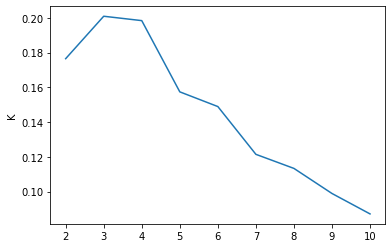

In [8]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')  #one can also use elbow method
plt.ylabel('K')
plt.show()

In [23]:
k = 3
kmodel = KMeans(n_clusters=k, n_jobs=-1, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
os.mkdir('/output')
shutil.rmtree('/output')
for i in range(k):
	os.makedirs("/output/cluster" + str(i))
for i in range(len(paths)):
	shutil.copy2(paths[i], "/output/cluster"+str(kpredictions[i]))